<a href="https://colab.research.google.com/github/hamidsadeghi68/face-clustering/blob/main/face_clustering_arcface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**install** insighface package for google colab

In [ ]:
!pip install -U insightface

import torch
if torch.cuda.is_available():
  print('gpu is available')
  !pip install onnxruntime-gpu==1.9.0  # to use GPU
else:
  print('gpu is not available')
  !pip install onnxruntime

gpu is available
     |████████████████████████████████| 95.6 MB 1.4 MB/s 
  Attempting uninstall: onnxruntime-gpu
    Found existing installation: onnxruntime-gpu 1.10.0
    Uninstalling onnxruntime-gpu-1.10.0:
      Successfully uninstalled onnxruntime-gpu-1.10.0


**download sample dataset**

In [ ]:
!mkdir datasets
!wget https://github.com/hamidsadeghi68/face-clustering/raw/main/sample_images/sample_lfw_images.zip -P datasets
!unzip "./datasets/sample_lfw_images.zip" -d './datasets/sample_lfw_images'

--2022-01-08 04:30:37--  https://github.com/hamidsadeghi68/face-clustering/raw/main/sample_images/sample_lfw_images.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hamidsadeghi68/face-clustering/main/sample_images/sample_lfw_images.zip [following]
--2022-01-08 04:30:37--  https://raw.githubusercontent.com/hamidsadeghi68/face-clustering/main/sample_images/sample_lfw_images.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 351314 (343K) [application/zip]
Saving to: ‘datasets/sample_lfw_images.zip’

sample_lfw_images.z 100%[===================>] 343.08K  --.-KB/s    in 0.03s   

2022-01-08 04

**prepare insightface module**

In [ ]:
import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

app = FaceAnalysis()
app.prepare(ctx_id=0, det_thresh=0.5)

download_path: /root/.insightface/models/buffalo_l


100%|██████████| 281857/281857 [00:08<00:00, 34488.78KB/s]
/usr/local/lib/python3.7/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:353: UserWarning: Deprecation warning. This ORT build has ['CUDAExecutionProvider', 'CPUExecutionProvider'] enabled. The next release (ORT 1.10) will require explicitly setting the providers parameter (as opposed to the current behavior of providers getting set/registered by default based on the build flags) when instantiating InferenceSession.For example, onnxruntime.InferenceSession(..., providers=["CUDAExecutionProvider"], ...)
  "based on the build flags) when instantiating InferenceSession."


Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'do_copy_in_default_stream': '1', 'arena_extend_strategy': 'kNextPowerOfTwo', 'gpu_external_empty_cache': '0', 'gpu_external_free': '0', 'cudnn_conv_use_max_workspace': '0', 'gpu_mem_limit': '18446744073709551615', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'gpu_external_alloc': '0', 'device_id': '0'}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'do_copy_in_default_stream': '1', 'arena_extend_strategy': 'kNextPowerOfTwo', 'gpu_external_empty_cache': '0', 'gpu_external_free': '0', 'cudnn_conv_use_max_workspace': '0', 'gpu_mem_limit': '18446744073709551615', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'gpu_external_alloc': '0', 'device_id': '0'}}
find model: /ro

**feature extraction**

In [ ]:
import os
import cv2
import numpy as np

dataset_path = './datasets/sample_lfw_images'
files = os.listdir(dataset_path)

accepted_files = []
features = []
counter = 1
for file in files:
  if not file.endswith('.jpg'):
    continue
  print('prosessing image %d: %s'%(counter,file))
  
  img = cv2.imread(os.path.join(dataset_path, file))
  faces = app.get(img)
  features.append(faces[0].normed_embedding)

  accepted_files.append(file)
  
  counter+=1

prosessing image 1: 03.jpg
prosessing image 2: 09.jpg
prosessing image 3: 23.jpg
prosessing image 4: 07.jpg
prosessing image 5: 13.jpg
prosessing image 6: 18.jpg
prosessing image 7: 20.jpg
prosessing image 8: 15.jpg
prosessing image 9: 02.jpg
prosessing image 10: 21.jpg
prosessing image 11: 06.jpg
prosessing image 12: 01.jpg
prosessing image 13: 05.jpg
prosessing image 14: 22.jpg
prosessing image 15: 19.jpg
prosessing image 16: 25.jpg
prosessing image 17: 10.jpg
prosessing image 18: 17.jpg
prosessing image 19: 08.jpg
prosessing image 20: 16.jpg
prosessing image 21: 11.jpg
prosessing image 22: 04.jpg
prosessing image 23: 24.jpg
prosessing image 24: 12.jpg
prosessing image 25: 14.jpg


display function

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_clustering_result(y_prediction, data_path, file_names):
  figsize = 2

  num_of_clusters = max(y_prediction)+1
  for cluster_id in range(num_of_clusters):
    indeces = y_prediction==cluster_id
    num_of_images = sum(indeces)
    
    plt.figure(figsize=(figsize*num_of_images, figsize))

    c = 1
    for i, file_name in enumerate(file_names):
      if indeces[i]:
        plt.subplot(1, num_of_images, c)
        img = mpimg.imread(os.path.join(data_path, file_name))
        plt.imshow(img)
        c+=1
  
  # noise images
  noise_indecs = np.where(y_prediction == -1)
  for i in noise_indecs[0]:
    plt.figure(figsize=(figsize, figsize))
    img = mpimg.imread(os.path.join(data_path, file_names[i]))
    plt.imshow(img)

**K-means clustering**

[ 4  0  2  0  3  1  7  6  5  2  4  5  4  2  7 10  8  1  0  1  8  4  9  3
  6]


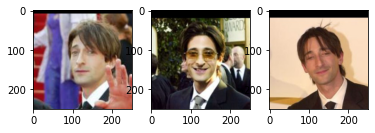

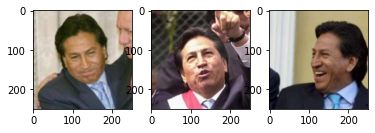

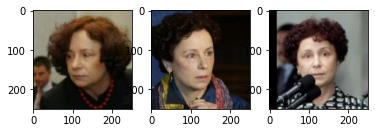

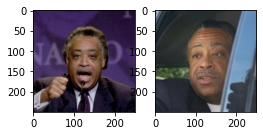

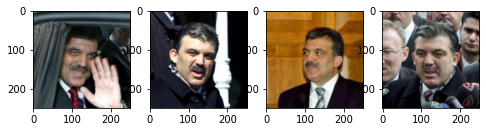

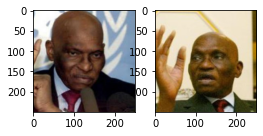

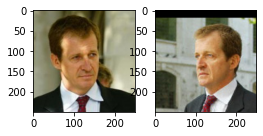

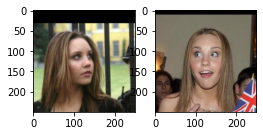

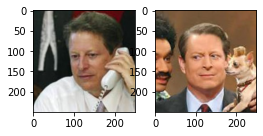

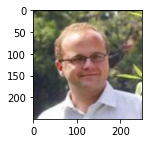

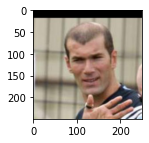

In [ ]:
from sklearn import cluster
k = 11 # the number of clusters
y_pred = cluster.KMeans(n_clusters=k, random_state=0).fit_predict(features)
print(y_pred)
show_clustering_result(y_pred, dataset_path, accepted_files)

**DBSCAN Clustering**

[ 0  1  2  1  3  4  5  6  7  2  0  7  0  2  5 -1  8  4  1  4  8  0 -1  3
  6]


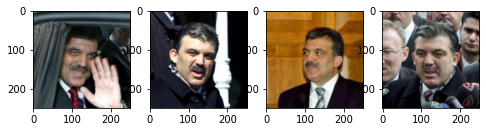

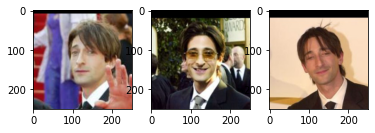

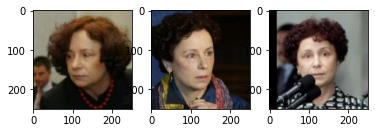

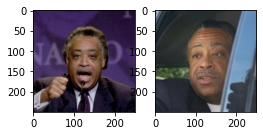

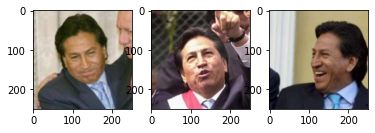

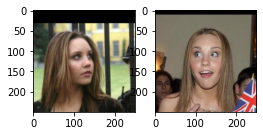

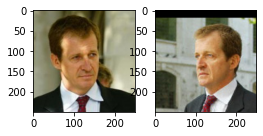

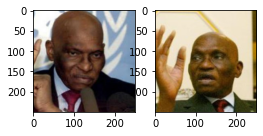

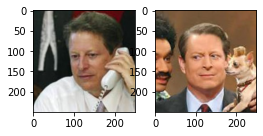

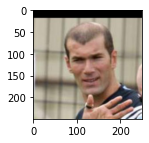

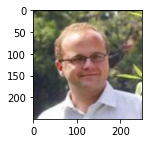

In [ ]:
y_pred = cluster.DBSCAN(eps=1, min_samples=2).fit_predict(features)
print(y_pred)
show_clustering_result(y_pred, dataset_path, accepted_files)

**Agglomerative Clustering**

[ 3 10  2 10  4  5  1  9  7  2  3  7  3  2  1  8  0  5 10  5  0  3  6  4
  9]


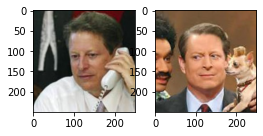

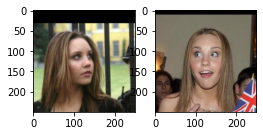

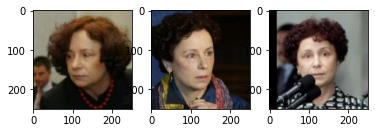

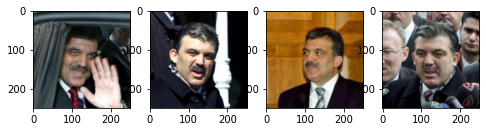

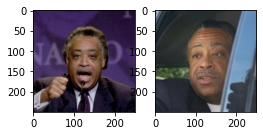

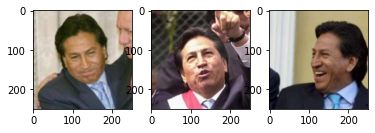

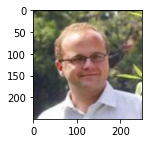

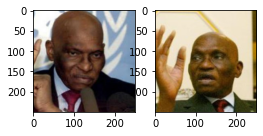

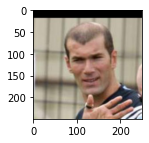

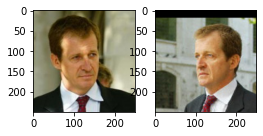

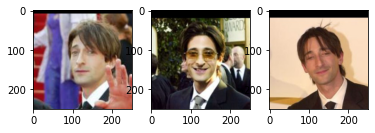

In [ ]:
y_pred = cluster.AgglomerativeClustering(n_clusters=None, distance_threshold=1, linkage='single').fit_predict(features)
print(y_pred)
show_clustering_result(y_pred, dataset_path, accepted_files)